In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, r2_score, accuracy_score

In [4]:
data = pd.read_csv('/content/mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [6]:
data.shape

(8124, 23)

**Feature Description**

• cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s

• cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s

• cap-colour: brown=n, buff=b, cinnamon=c, Gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y

• bruises: bruises=t, no=f

• odour: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s

• gill-attachment: attached=a, descending=d, free=f, notched=n

• gill-spacing: close=c, crowded=w, distant=d

• gill-size: broad=b, narrow=n

• gill-colour: black=k, brown=n, buff=b, chocolate=h, grey=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y

• stalk-shape: enlarging=e, tapering=t

• Stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?

• stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s

• stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s

• stalk-colour-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

• stalk-colour-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

• veil-type: partial=p, universal=u

• veil-colour: brown=n, orange=o, white=w, yellow=y

• ring-number: none=n, one=o, two=t

• ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z

• spore-print-colour: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y

• population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y

• habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
for col in data.columns:
  print(data[col].value_counts())

e    4208
p    3916
Name: class, dtype: int64
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
f    4748
t    3376
Name: bruises, dtype: int64
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
f    7914
a     210
Name: gill-attachment, dtype: int64
c    6812
w    1312
Name: gill-spacing, dtype: int64
b    5612
n    2512
Name: gill-size, dtype: int64
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
t    4608
e    3516
Name: stalk-shape, dtype: int64
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64
s    5176
k    2372
f     552
y      24
Name: stalk-surf

In [9]:
data['stalk-root'].unique()

array(['e', 'c', 'b', 'r', '?'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


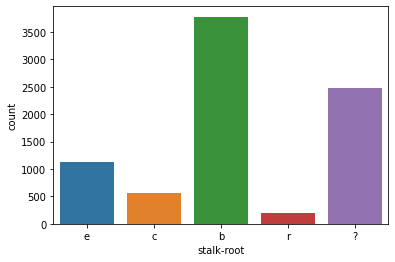

In [10]:
sns.countplot(data['stalk-root'])

In [11]:
data = data.replace('?', np.nan)

In [12]:
data = data.fillna(data['stalk-root'].mode()[0])

In [13]:
data['stalk-root'].unique()

array(['e', 'c', 'b', 'r'], dtype=object)

In [14]:
data.duplicated().sum()

0

No duplicates are there in the data.

# **Encoding.**

In [15]:
def encode(data):
  for col in data.columns:
    data[col] = data[col].factorize()[0]
  return data

In [16]:
encoded_data1 = encode(data.copy())
encoded_data1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,2,1


In [17]:
encoded_data1['cap-shape'].unique()

array([0, 1, 2, 3, 4, 5])

In [18]:
encoded_data = data.copy()

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in encoded_data.columns:
    encoded_data[col] = le.fit_transform(encoded_data[col])

encoded_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,2,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,1,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,1,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,2,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,2,2,2,7,7,0,2,1,0,3,0,1


In [20]:
encoded_data['cap-shape'].unique()

array([5, 0, 4, 2, 3, 1])

In [21]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


# **Modelling.**

## **splitting into target and feature variables.**

In [22]:
x = encoded_data.drop('class', axis=1)
y = encoded_data['class']

## **splitting into train and test data.**

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=42)

## **Linear Regression.**

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

#print('accuracy_score is:', accuracy_score(y_test, y_pred_lr))
print('r2_score is:', r2_score(y_test, y_pred_lr))

r2_score is: 0.7406945293235365


## **Logistic Regression.**

In [29]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(max_iter=500)

logit.fit(x_train, y_train)
y_pred_logit = logit.predict(x_test)

print('accuracy_score is:', accuracy_score(y_test, y_pred_logit))
print('r2_score is:', r2_score(y_test, y_pred_logit))

accuracy_score is: 0.9537173806006893
r2_score is: 0.8147617014670496


## **Decision Tree Classifier**.

In [30]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

tree.fit(x_train, y_train)
y_pred_tree = tree.predict(x_test)

print('accuracy_score is:', accuracy_score(y_test, y_pred_tree))
print('r2_score is:', r2_score(y_test, y_pred_tree))

accuracy_score is: 1.0
r2_score is: 1.0


In [ ]:
pd.Series(tree.feature_importances_, index=x.columns).sort_values(ascending=False)

## **Random Forest Classifier.**

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()  # by default bootstrap=True

rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

print('accuracy_score is:', accuracy_score(y_test, y_pred_rf))
print('r2_score is:', r2_score(y_test, y_pred_rf))

accuracy_score is: 1.0
r2_score is: 1.0


## **Extra Trees Classifier.**

In [38]:
from sklearn.ensemble import ExtraTreesClassifier
extra = ExtraTreesClassifier()  # by default bootstrap=False, means the whole dataset is used to build each tree.

extra.fit(x_train, y_train)
y_pred_extra = extra.predict(x_test)

print('accuracy_score is:', accuracy_score(y_test, y_pred_extra))
print('r2_score is:', r2_score(y_test, y_pred_extra))

accuracy_score is: 1.0
r2_score is: 1.0


## **Gradient Boosting Classifier.**

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

gbc.fit(x_train, y_train)
y_pred_gbc = gbc.predict(x_test)

print('accuracy_score is:', accuracy_score(y_test, y_pred_gbc))
print('r2_score is:', r2_score(y_test, y_pred_gbc))

accuracy_score is: 1.0
r2_score is: 1.0


## **XG Boost**

In [33]:
from xgboost import XGBClassifier
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 15, n_estimators = 200)

xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

print('accuracy_score is:', accuracy_score(y_test, y_pred_xgb))
print('r2_score is:', r2_score(y_test, y_pred_xgb))

accuracy_score is: 1.0
r2_score is: 1.0


## **Naive Bayes Classifier.**

In [34]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(x_train, y_train)
y_pred_gnb = gnb.predict(x_test)

print('accuracy_score is:', accuracy_score(y_test, y_pred_gnb))
print('r2_score is:', r2_score(y_test, y_pred_gnb))

accuracy_score is: 0.9049729197439685
r2_score is: 0.6196703019483041


In [35]:
from sklearn.naive_bayes import BernoulliNB
bern = BernoulliNB()

bern.fit(x_train, y_train)
y_pred_bern = bern.predict(x_test)

print('accuracy_score is:', accuracy_score(y_test, y_pred_bern))
print('r2_score is:', r2_score(y_test, y_pred_bern))


accuracy_score is: 0.8394879369768586
r2_score is: 0.3575778157261509


In [39]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier','Extra Tree Classifier',
               'Gradient Boosting Classifier', 'XgBoost Classifier', 'Gaussian NB', 'Bernoulli NB'],
    'Score' : [lr.score(x_test, y_test), logit.score(x_test, y_test), tree.score(x_test, y_test), rf.score(x_test, y_test), extra.score(x_test, y_test),
               gbc.score(x_test, y_test), xgb.score(x_test, y_test), gnb.score(x_test, y_test), bern.score(x_test, y_test)]
})

In [40]:
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Decision Tree Classifier,1.000000
3,Random Forest Classifier,1.000000
4,Extra Tree Classifier,1.000000
5,Gradient Boosting Classifier,1.000000
6,XgBoost Classifier,1.000000
1,Logistic Regression,0.953717
7,Gaussian NB,0.904973
8,Bernoulli NB,0.839488
0,Linear Regression,0.740695
